# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [20]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [45]:
athletes = pd.read_csv("https://raw.githubusercontent.com/flother/rio2016/master/athletes.csv")

In [22]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [23]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [24]:
athletes.shape

(11538, 12)

In [25]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [26]:
# variaveis de interesse
height = athletes['height']
weight = athletes['weight']

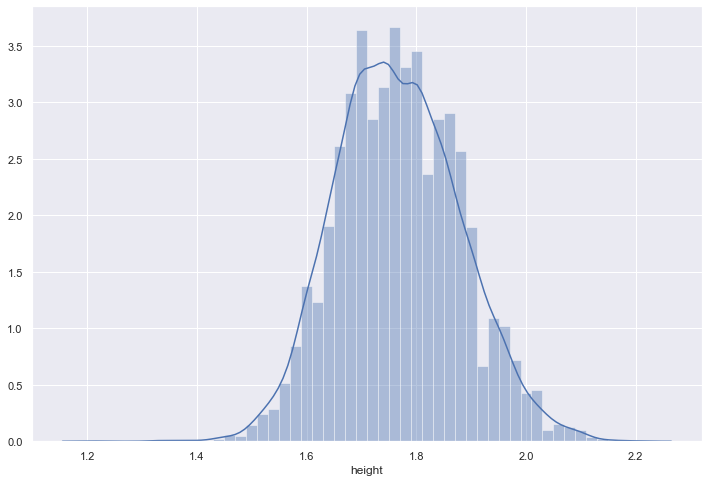

In [27]:
sns.distplot(height)

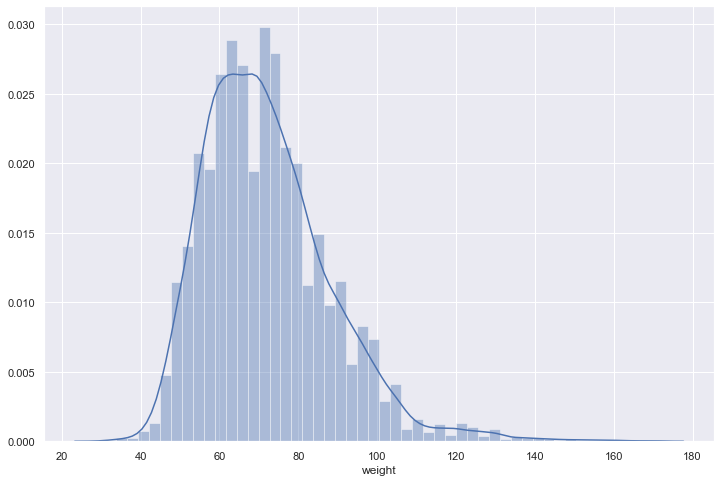

In [28]:
sns.distplot(weight)

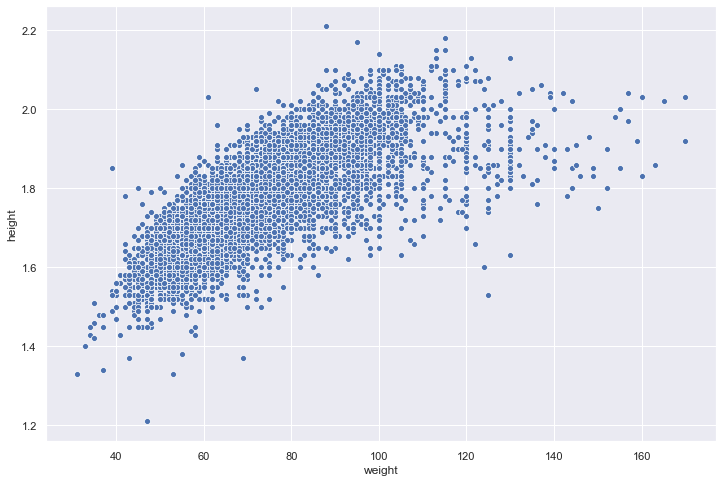

In [29]:
sns.scatterplot(x="weight", y="height", data=athletes)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [48]:
def q1():
    # Retorne aqui o resultado da questão 1.
    samples = get_sample(athletes, col_name='height', n=3000)
    shapiro1, shapiro2 = sct.shapiro(samples)
    return bool(shapiro2 > 0.05)
q1()

False

Curtose: -0.025342036211864816 - Skew: 0.1714716351066293
Media: 1.766282119914347 - STD: 0.11271869117624804


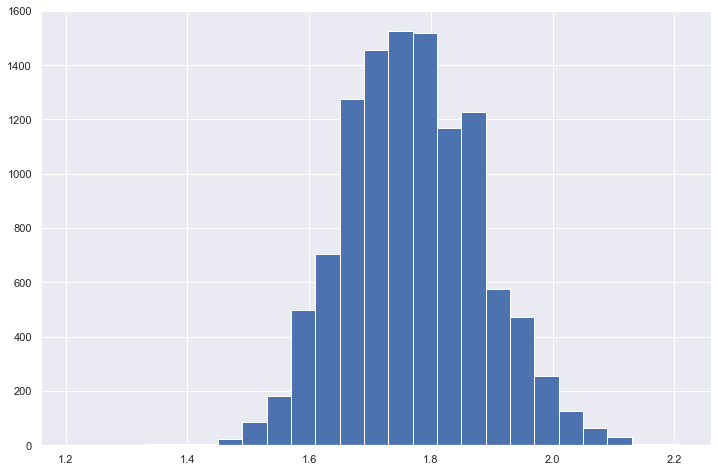

In [31]:
#Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
# o histograma e o valor de curtose mostram que o resultado do teste q1 é condizente. Um valor de curtose < 0
# indica que a distribuição é mais achatada que a distribuição normal.
athletes['height'].hist(bins=25)
curtose = athletes['height'].kurtosis()
skew = athletes['height'].skew()
mean = athletes['height'].mean()
std = athletes['height'].std()
print(f'Curtose: {curtose} - Skew: {skew}')
print(f'Media: {mean} - STD: {std}')

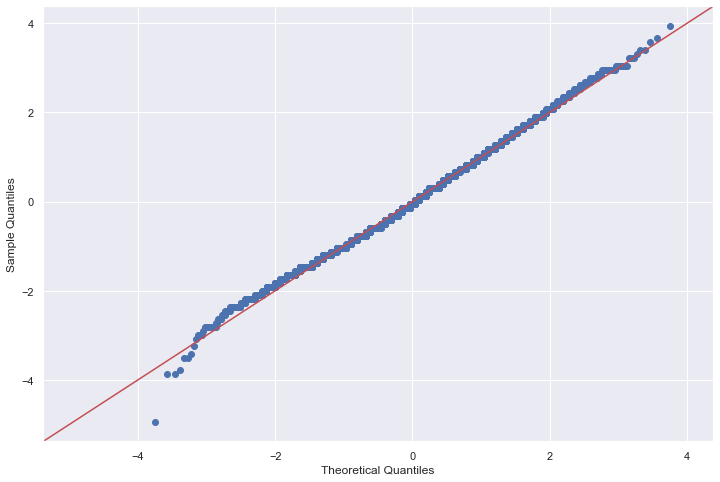

In [32]:
# Plote o qq-plot para essa variável e a analise
#Confirmando as outras analises, o qq-plot mostra uma variancia na cauda esquerda e na direita
import statsmodels.api as sm
sm.qqplot(athletes.height.dropna(), fit=True, line="45");

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

**Reflexões:** O resultado foi interessante. Analisando o curtose e a assimetria devemos considerar que a distribuição não é normal, porém, a variação nesses dois indicadores são tão insignificantes que, em termos práticos, podemos sim considerar a distribuição **_aproximandamente_** normal.<br>
O qq-plot nos dá mais segurança ao considerar a distribuição aproximadamente normal.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [33]:
def q2():
    # Retorne aqui o resultado da questão 2.
    samples = get_sample(athletes, col_name='height', n=3000)
    jb1, jb2 = sct.jarque_bera(samples)
    return bool(jb2 > .05)
    
q2()

False

In [34]:
# Esse resultado faz sentido?
# Sim. O teste Jarque-Bera leva em consideração a curtose e a assimetria para determinar se a amostra é normal.
# como vimos anteriormente, a curtose é < 0, logo conclui-se que a amostra não é normal, por isso o teste q2 retornou false

__Para refletir__:

* Esse resultado faz sentido?

A reflexão é a mesma que a anterior.<br>

**Reflexões:** O resultado foi interessante. Analisando o curtose e a assimetria devemos considerar que a distribuição não é normal, porém, a variação nesses dois indicadores são tão insignificantes que, em termos práticos, podemos sim considerar a distribuição **_aproximandamente_** normal.<br>
O qq-plot nos dá mais segurança ao considerar a distribuição aproximadamente normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [35]:
def q3():
    # Retorne aqui o resultado da questão 3.
    samples = get_sample(athletes, col_name='weight', n=3000)
    normal_t1, normal_t2 = sct.normaltest(samples)
    return bool(normal_t2 > .05)
q3()

False

Curtose: 2.1955826652394252 - skew: 1.0639236240608656


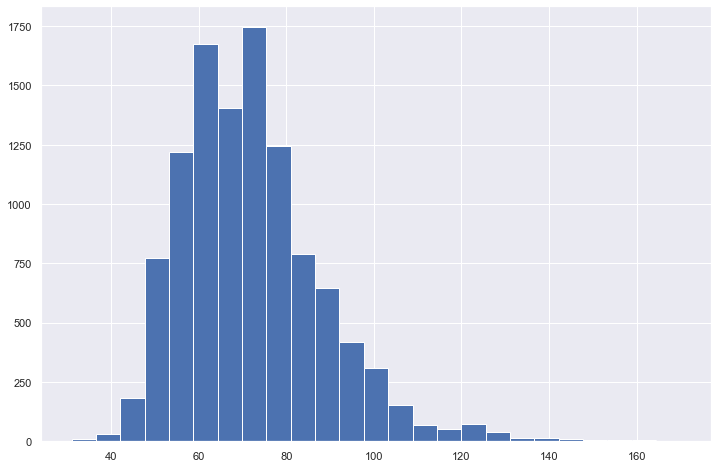

In [36]:
#Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
# o histograma e o valor de curtose mostram que o resultado do teste q3 é condizente. Um valor de curtose > 0
# indica que a distribuição é mais acentuada que a distribuição normal.
athletes['weight'].hist(bins=25)
curtose = athletes['weight'].kurtosis()
skew=athletes['weight'].skew()
print(f'Curtose: {curtose} - skew: {skew}')

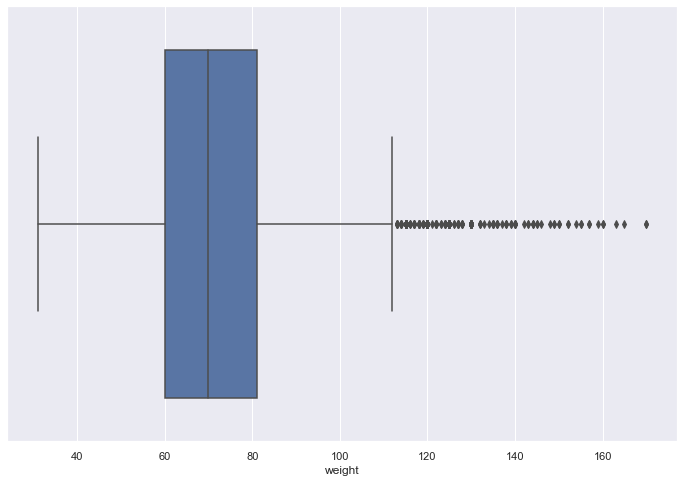

In [37]:
# Um box plot também poderia ajudar a entender a resposta.
sns.boxplot(x=athletes["weight"])

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

False

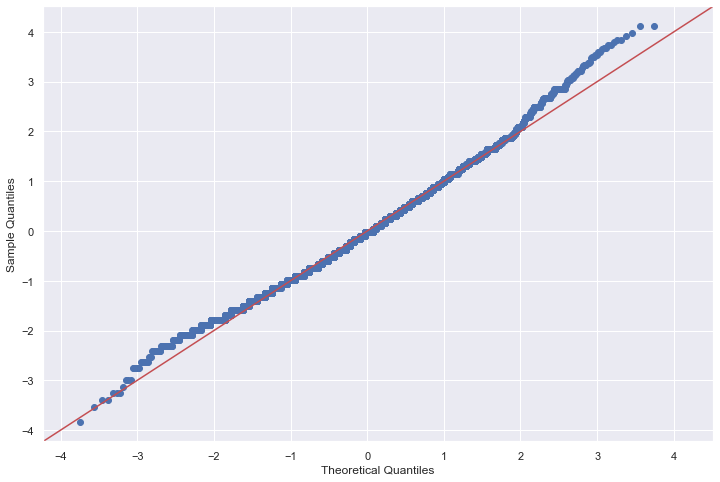

In [65]:
def q4():
    # Retorne aqui o resultado da questão 4.
    log_weight = pd.DataFrame({'weight':np.log(athletes['weight'])})
    samples = get_sample(log_weight, col_name='weight', n=3000)
    normal_t1, normal_t2 = sct.normaltest(samples)
    
    sm.qqplot(log_weight['weight'].dropna(), fit=True, line='45');
    
    return bool(normal_t2 > .05)
q4()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [68]:
def q5():
    bra = athletes.query('nationality == "BRA"')
    usa = athletes.query('nationality == "USA"')

    ttest_ind1, ttest_ind2 = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
    return bool (ttest_ind2 > .05)
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [69]:
def q6():
    bra = athletes.query('nationality == "BRA"')
    can = athletes.query('nationality == "CAN"')

    ttest_ind1, ttest_ind2 = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
    return bool (ttest_ind2 > .05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [74]:
def q7():
    usa = athletes.query('nationality == "USA"')
    can = athletes.query('nationality == "CAN"')
    
    ttest_ind1, ttest_ind2 = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')
    return round(ttest_ind2,8)
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

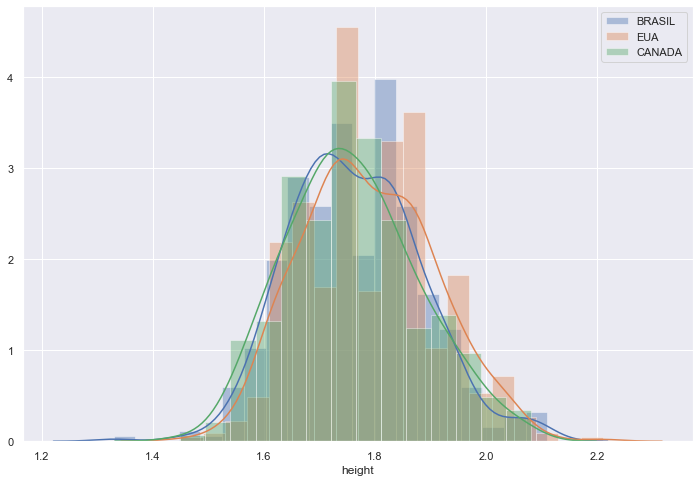

In [73]:
bra = athletes.query('nationality == "BRA"')
can = athletes.query('nationality == "CAN"')
usa = athletes.query('nationality == "EUA"')

sns.distplot(bra.height.dropna(), label='BRASIL')
sns.distplot(usa.height.dropna(), label='EUA')
sns.distplot(can.height.dropna(), label='CANADA')
plt.legend()

### Analises extras

1.7662821199143468


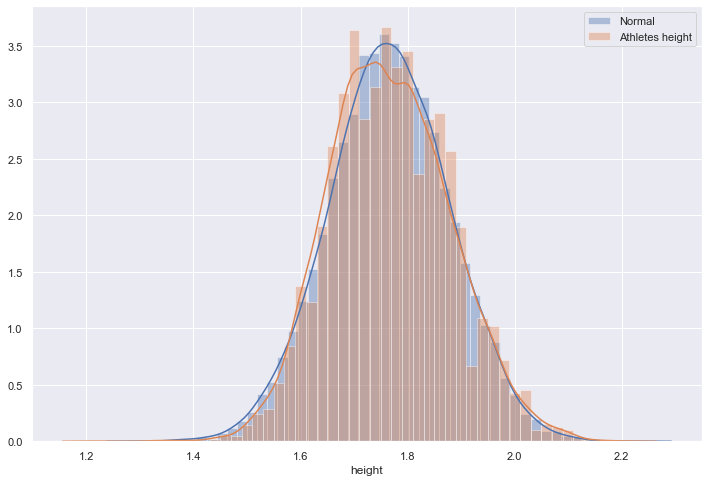

In [147]:
# Comparando o histograma do dataset athletes com uma distribuição normal
mean = athletes['height'].dropna().mean()
std = athletes['height'].dropna().std()

normal = sct.norm.rvs(loc=mean, scale=std, size=athletes.shape[0])
sns.distplot(normal, label='Normal')
sns.distplot(athletes['height'], label='Athletes height')
plt.legend()

In [148]:
height_test = 1.7662821199143468
normal_cdf = sum(sct.norm.cdf(height_test, normal)) / len(normal)
athletes_height_cdf = sum(sct.norm.cdf(height_test, athletes['height'].dropna())) / len(athletes['height'].dropna())
print(f'{normal_cdf}')
print(f'{athletes_height_cdf}')

0.5000189337465084
0.5000161332378851
